In [1]:
import pandas as pd
df = pd.read_csv("../../data/scraped_geo.csv")

The code below will find the optimal k in kmeans by using the elbow plot method.

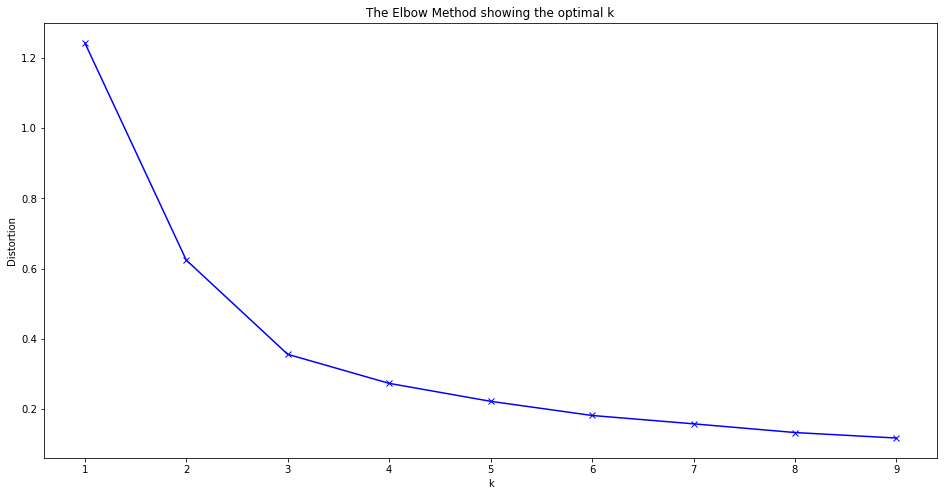

In [2]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

X = df.values[:,3:]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(init = "k-means++", n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It appears when K = 3 or K=4, the classification is optimal. We will choose K = 4 because of how the data is spread (see plot below).

In [4]:
k=4
kmeanModel = KMeans(init = "k-means++", n_clusters=k)
kmeanModel.fit(X)
labels = kmeanModel.labels_

df['Labels'] = labels

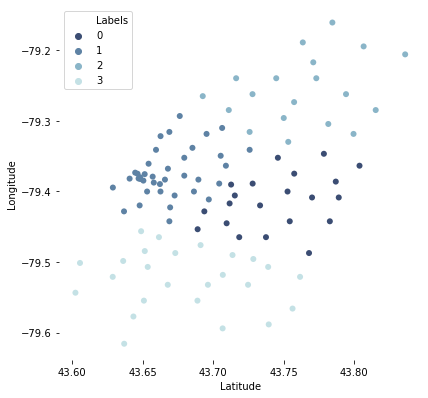

In [5]:
import seaborn as sns

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="Latitude", y="Longitude",
                hue="Labels",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

After visualizing the data, it looks like that cluster 1 have a bunch of datapoints it the -79.38 and 43.64 range. Clusters 0 an 1 divide the mid-longitude population into two different groups, one which is points are close and one which has points that are more disbursed. Overall, I would say that the clustering is generally sufficient. 